__Nama: *Agil Budi Prasetyo*__

__NIM: *185410012*__

__Prodi: *Informatika*__

dataset-link: by Kaggel [Gold Price Prediction Dataset](https://www.kaggle.com/sid321axn/gold-price-prediction-dataset)

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split


#load a CSV file
def load_data_csv(filename):
    dataset = pd.read_csv(filename)
    return dataset

def initialize_xy(dataset):
    lin = list()
    data = pd.DataFrame(dataset, columns=['Open','High','Low','Close'])
    x = data.iloc[:,0:3].values
    y = data.iloc[:,-1].values
    column = data.columns
    lin.append(x)
    lin.append(y)
    lin.append(column)
    return lin

In [214]:
import tensorflow as tf

filename = 'src\FINAL_USO.csv'
dataset = load_data_csv(filename)
xy = initialize_xy(dataset)
x = xy[0]
y = xy[1]
n_epochs = 800
batch_size = 128

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=3, activation='relu'))
model.add(tf.keras.layers.Dense(units=9, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(x_train, y_train, batch_size, n_epochs)
y_test

Epoch 1/800
11/11 [==============================] - 5s 4ms/step - loss: 104.9442
Epoch 2/800
11/11 [==============================] - 0s 6ms/step - loss: 99.3170
Epoch 3/800
11/11 [==============================] - 0s 5ms/step - loss: 93.4404
Epoch 4/800
11/11 [==============================] - 0s 4ms/step - loss: 87.2993
Epoch 5/800
11/11 [==============================] - 0s 5ms/step - loss: 80.8550
Epoch 6/800
11/11 [==============================] - 0s 6ms/step - loss: 74.0861
Epoch 7/800
11/11 [==============================] - 0s 5ms/step - loss: 66.9852
Epoch 8/800
11/11 [==============================] - ETA: 0s - loss: 61.55 - 0s 5ms/step - loss: 59.4906
Epoch 9/800
11/11 [==============================] - 0s 7ms/step - loss: 51.6445
Epoch 10/800
11/11 [==============================] - 0s 6ms/step - loss: 43.3933
Epoch 11/800
11/11 [==============================] - 0s 8ms/step - loss: 34.7181
Epoch 12/800
11/11 [==============================] - 0s 7ms/step - loss: 25.6237


array([119.900002, 118.760002, 116.209999, 102.269997, 116.68    ,
       126.449997, 156.309998, 111.980003, 119.260002, 120.660004,
       115.989998, 153.229996, 108.410004, 127.209999, 131.639999,
       112.139999, 117.910004, 119.699997, 105.370003, 133.910004,
       160.850006, 118.550003, 163.089996, 152.080002, 116.400002,
       136.419998, 122.949997, 122.790001, 121.559998, 105.349998,
       154.190002, 131.309998, 113.019997, 116.169998, 124.769997,
       157.839996, 113.32    , 169.699997, 112.040001, 117.470001,
       116.790001, 113.5     , 122.82    , 127.580002, 115.43    ,
       112.730003, 161.160004, 124.379997, 128.990005, 120.459999,
       171.699997, 156.770004, 171.960007, 120.769997, 119.650002,
       162.699997, 161.979996, 120.57    , 127.019997, 119.169998,
       115.059998, 113.580002, 159.369995, 123.639999, 119.660004,
       125.43    , 115.050003, 154.5     , 104.739998, 115.940002,
       124.940002, 128.279999, 156.479996, 114.      , 125.410

In [215]:
predict = model.predict(x_test)
print(x_test)

[[119.629997 120.139999 119.580002]
 [117.360001 118.809998 116.800003]
 [116.540001 117.349998 115.849998]
 ...
 [116.610001 116.980003 116.389999]
 [127.230003 127.620003 127.050003]
 [154.5      154.800003 154.220001]]


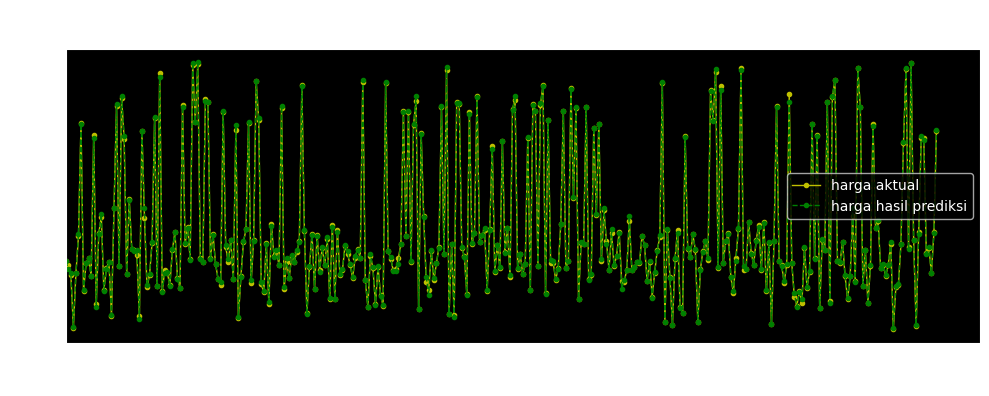

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

total_hari = list()
tick = list()

index = 0
for i in y_test:
    total_hari.append(index)
    index += 1

for i in total_hari:
    if (i%20 == 0):
        tick.append(i)


fig, ax1 = plt.subplots(1,1, figsize=(10,4), dpi=100)
 
fig.suptitle('Prediksi Harga Emas')
ax1.plot(total_hari, y_test, 'y.-', lw=1)
ax1.plot(total_hari, predict, 'g.--', lw=1)
ax1.set_ylabel('Harga($)')
ax1.set_xlabel('Hari Ke')
ax1.set_xbound(0)
ax1.legend(['harga aktual', 'harga hasil prediksi'])
ax1.set_xticks(tick)

plt.tight_layout()
plt.show()